# <span style="font-family: Arial; color: blue;">Module-07 (Task 4)</span>



* Author : [Prabha Sapkota](https://github.com/prabhasapkota)
* Date : 10-03-2023
* [GitHub Repository](https://github.com/prabhasapkota/datafun-07-ml-predictive)

## Part 1 : Linear Regression

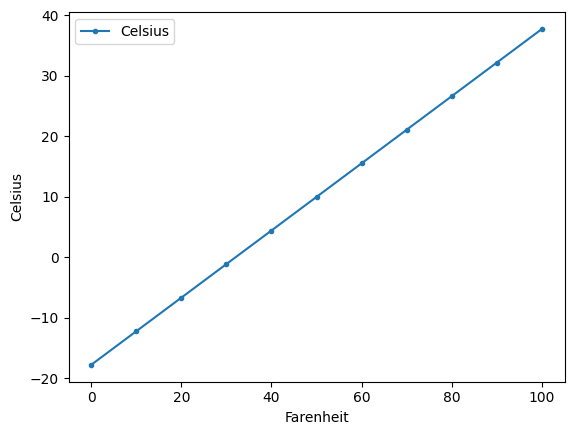

In [3]:
import pandas as pd

c = lambda f: 5/9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]

temps_df = pd.DataFrame(temps, columns=["Farenheit", "Celsius"])
axes = temps_df.plot(x = "Farenheit", y= "Celsius", style= ".-")
y_label = axes.set_ylabel("Celsius")

## Section 1 : Load

In [4]:
nyc = pd.read_csv("ave_hi_nyc_jan_1895-2018.csv")

# Section 2 : View

In [5]:
nyc.head(), nyc.tail()

(     Date  Value  Anomaly
 0  189501   34.2     -3.2
 1  189601   34.7     -2.7
 2  189701   35.5     -1.9
 3  189801   39.6      2.2
 4  189901   36.4     -1.0,
        Date  Value  Anomaly
 119  201401   35.5     -1.9
 120  201501   36.1     -1.3
 121  201601   40.8      3.4
 122  201701   42.8      5.4
 123  201801   38.7      1.3)

# Section 3 : Clean

In [6]:
nyc.columns = ["Date", "Temperature", "Anomaly"]
nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


# Section 4 : Describe

In [7]:
pd.set_option("display.precision", 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

## Section 5 : Calculate

In [9]:
from scipy import stats

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

linear_regression.slope, linear_regression.intercept


(0.014771361132966163, 8.694993233674289)

## Section 6 : Predict

In [10]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

## Section 7 : Plot

(10.0, 70.0)

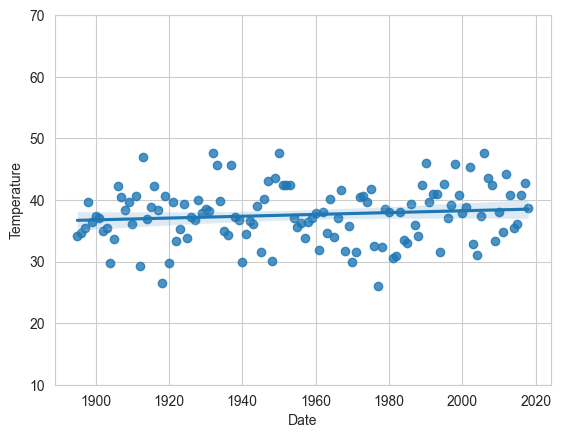

In [12]:
import seaborn as sns
sns.set_style("whitegrid")
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

## Part 2 : Machine Learning

## Initial Setup 

In [8]:
import pandas as pd

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')  

nyc.columns= ['Date','Temperature', 'Anomaly'] 

nyc.Date = nyc.Date.floordiv(100) 

nyc.head(3) 

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


##  Section 1 : Split Data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values, random_state=11)

X_train.shape, X_test.shape

((93, 1), (31, 1))

## Section 2 : Training

In [10]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

linear_regression.coef_, linear_regression.intercept_

(array([0.01939167]), -0.30779820252658396)

## Section 2 : Testing

In [12]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected:{e:.2f}')

predicted: 37.86, expected:31.70
predicted: 38.69, expected:34.80
predicted: 37.00, expected:39.40
predicted: 37.25, expected:45.70
predicted: 38.05, expected:32.30
predicted: 37.64, expected:33.80
predicted: 36.94, expected:39.70


## Section 3 : Predict

In [13]:
predict = (lambda x: linear_regression.coef_*x+linear_regression.intercept_)

predict(2030)

array([39.05729859])

## Section 4 : Plot

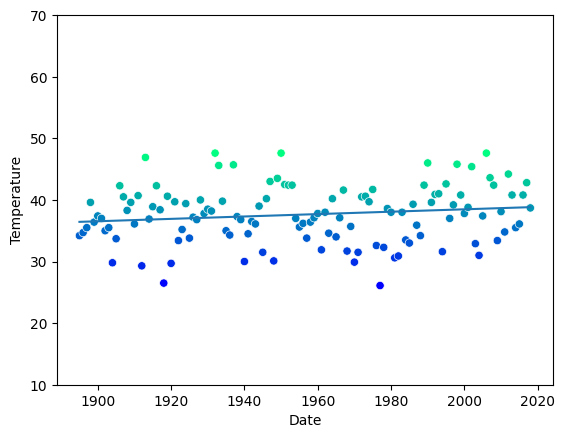

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10,70)
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
line = plt.plot(x,y)


## Remarks

* I found the first method was relatively easier to execute and understand than Machine learning one. Having said that, I guess Machine Learning will be easier aftyer I go in depth with Machine Learning courses.